 # Autos auf E-Bay 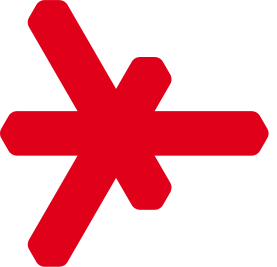
Dieses Notebook stellt einen Datensatz von Gebrauchtwagen auf E-Bay vor, den wir als Beispiel in der Vorlesung verwenden werden. Unser Endziel wird es sein, den Verkaufspreis eines Autos (gegeben Merkmale wie sein Alter, seine Marke, etc.) vorherzusagen.

Hierzu analysieren wir in diesem Notebook zunächst den Datensatz. Laden Sie die Datei 'cars.csv' aus Stud.IP herunter, plazieren Sie sie im gleichen Ordner wie das Notebook, und führen Sie die folgende Zelle aus. Es sollten Zeilen mit Merkmalen (0-56) ausgegeben werden.



In [2]:
import pandas
import numpy as np

# Anmerkung: Man kann die Datei auch in Excel/Libreoffice öffnen.
cars = pandas.read_csv('/kaggle/input/carscsv/cars.csv')

# Wir geben die Namen der Spalten/Merkmale aus.
columns = cars.columns
for i,col in enumerate(columns):
    print('%.2d : %s' %(i,col))
    
# Wir konvertieren die Daten in ein Numpy-Array.
data = cars.values.astype('float')

In 'data' befindet sich nun eine Datenmatrix. Jede Zeile entspricht einem Auto, jede Spalte einem Merkmal. Berechnen Sie den Durchschnittspreis aller Autos und den Median des Preises. Welcher der beiden Werte ist erwartungsgemäß höher?

In [ ]:
pricesData = data[:, 0]
avgPrice = np.mean(pricesData)
medianPrice = np.median(pricesData)
print(avgPrice, ", ", medianPrice)

Die folgende Zelle plottet ein Histogramm aller 'prices'. Führen Sie die Zelle aus. Speichern Sie zu Beginn in 'prices' sämtliche Preise.

Es sollte ein Histogramm-Plot erscheinen, der allerdings nur aus einem Balken besteht. Was ist das Problem?

In [ ]:
prices = pricesData

# display histogram of prices
import matplotlib.pyplot as plt
plt.hist(prices)
plt.show()

Die Methode hist() besitzt einen Parameter 'bins'. Hier kann man eine Liste von Grenzen zwischen den einzelnen Partitionen/bins des Histograms angeben. Versuchen Sie sinnvolle Bins zu übergeben, so dass das Histogramm aussagekräftiger wird.

In [ ]:
plt.hist(prices, bins=[0, 2000, 4000, 6000, 8000, 10000, 15000, prices.max(0)])
plt.show()


'data' enthält einige 'brand'-Spalten ('brand_audi', 'brand_bmw', ...) die angeben ob das jeweilige Auto zu einer bestimmten Marke gehört. Entfernen Sie diese Spalten aus dem Datensatz.

*Hinweis: Mit np.hstack() können Sie zwei Matrizen nebeneinaneder 'kleben'.*

In [6]:
np.hstack([data[:, 15], data[:, 55]])

Geben Sie das günstigste Auto aus. Warum ist es so günstig? Hat es einen Schaden?

In [ ]:
index = prices.argmin()
print(prices[index], " ", "damaged : ", data[prices.argmin(), 55])

Führen Sie eine kleine Datenprüfung durch: Stellen Sie sicher, dass jedes Auto entweder beschädigt oder nicht beschädigt ist (d.h., die letzten zwei Spalten des Datensatzes sind korrekt). Checken Sie, dass das Minimum der letzten und vorletzten Spalte immer =0 ist, und das Maximum immer =1.

*Hinweis: Mit np.all() können Sie prüfen ob eine Bedingug für **alle** Einträge eines Arrays gilt.*

In [4]:
print(np.all(data[:, 55] != data[:, 56]))

Um einen Eindruck von der Beziehung zwischen Preis und Kilometerstand zu erhalten, plotten wir eine kleine Punktwolke. In dieser ist der Preis die x-Achse, der Kilometerstand die y-Achse, und jedes Auto ist ein Punkt.

In [ ]:
prices = data[:, 0]
km = data[:, 3]

# plot km against price
plt.plot(prices, km, 'o', markersize=3)
plt.xlim([0,20000])
plt.ylim([0,200000])
plt.xlabel('price')
plt.ylabel('km')
plt.show()